In [3]:
# 2nd main stuff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# aim is to use features of a concrete to predict it's strength(csMPa)
concrete_data = pd.read_csv("./datasets/concrete_data.csv")

concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Text(0, 0.5, 'csMPa')

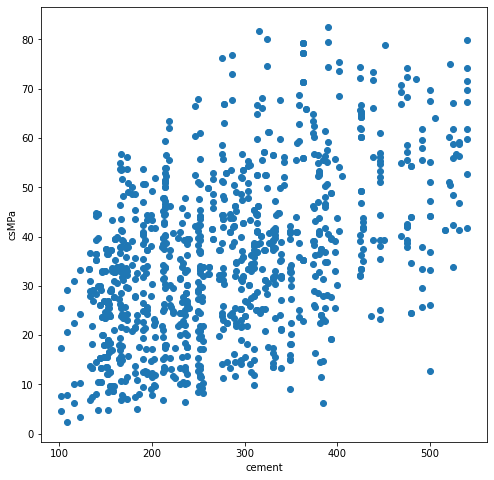

In [6]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(concrete_data.cement, concrete_data.csMPa)
plt.xlabel("cement")
plt.ylabel("csMPa")

Text(0, 0.5, 'csMPa')

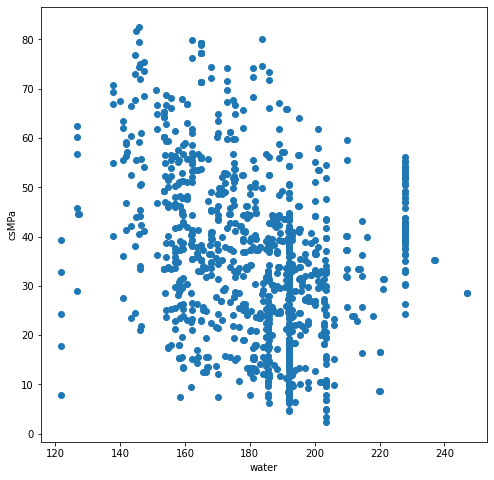

In [8]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(concrete_data.water, concrete_data.csMPa)
plt.xlabel("water")
plt.ylabel("csMPa")

<AxesSubplot:xlabel='age', ylabel='csMPa'>

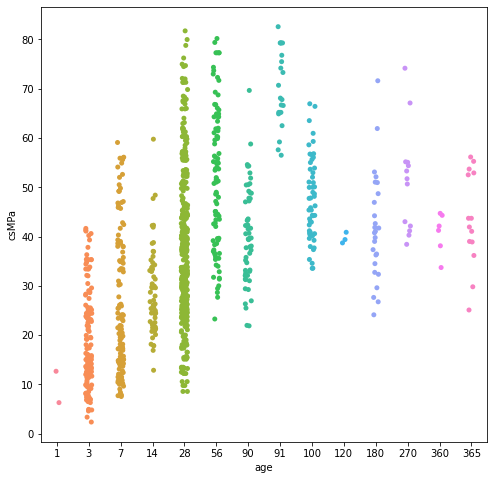

In [9]:
# strip plot is just like a scatter plot but for categorical data(each X cat has sep color)
fig, ax = plt.subplots(figsize = (8, 8))
sns.stripplot(concrete_data.age, concrete_data.csMPa)

<AxesSubplot:>

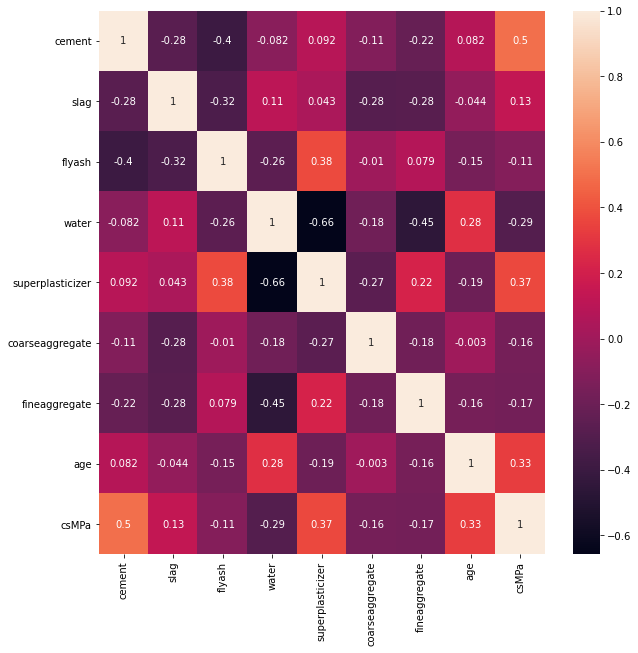

In [11]:
concrete_data_corr = concrete_data.corr()


plt.figure(figsize = (10, 10))
sns.heatmap(concrete_data_corr, annot = True)

In [14]:
X = concrete_data.drop("csMPa", axis = 1)

Y = concrete_data.csMPa

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

**Pasting**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor


bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators = 500,
                          bootstrap=False,   # pasting since sample without replacement
                          max_samples = 1.0,  # proportion of training data for sampling
                           n_jobs=-1)

In [29]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [30]:
y_pred = bag_reg.predict(x_test)

In [31]:
# df to show actual value vs prredicted value from model
df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

df.sample(10)

,Actual,Predicted
124,50.70,46.98576
155,77.30,77.30000
40,50.46,52.16930
710,36.96,31.31582
466,33.56,40.43140
861,37.26,37.27000
733,33.61,32.72000
946,32.96,32.96000
850,37.36,37.36000
1011,43.80,43.80310


In [32]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8305819371457741

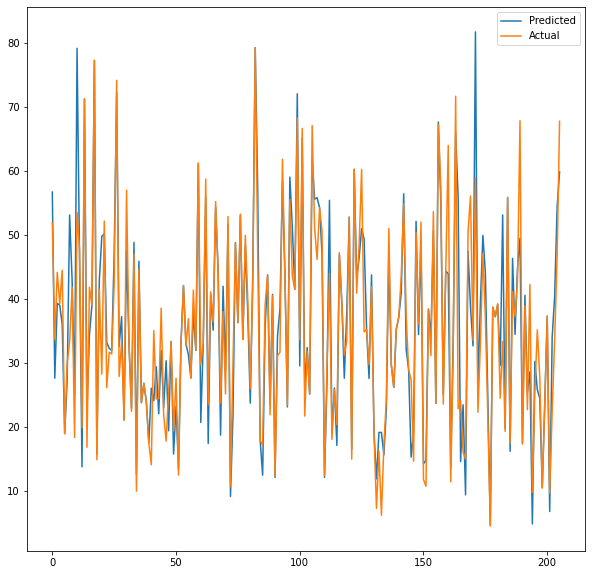

In [33]:
# line plot of actaul and predixted values to see closeness

plt.figure(figsize = (10, 10))

plt.plot(y_pred, label="Predicted")
plt.plot(y_test.values, label = "Actual")

plt.legend();

**Bagging**

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor


bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators = 500,
                          bootstrap=True,   # bagging since sample with replacement
                          max_samples = 0.8,  # proportion of training data for sampling
                           n_jobs=-1,
                          oob_score=True)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [35]:
bag_reg.oob_score_

0.9172136377138356

In [36]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8883631987862469

In [37]:
# Random subspacing(using random subsets of features)
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators = 500,
                          bootstrap=False,   # bagging since sample with replacement
                          max_samples = 1.0,  # proportion of training data for sampling
                           bootstrap_features=True,
                           max_features=0.8,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 bootstrap_features=True, max_features=0.8, n_estimators=500,
                 n_jobs=-1)

In [38]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7782166003460462